In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
path = 'mnist.npz'
mnist = np.load(path) # The MNIST dataset has four different datasets
            
train_labels = mnist['train_labels']
test_labels = mnist['test_labels']
            
train_data = mnist['train_data']
print("Training dataset dimensions before reshaping: ", train_data.shape)

train_data = train_data.reshape(train_data.shape[0],-1)
print("Training dataset dimensions after reshaping: ", train_data.shape)

test_data = mnist['test_data']
test_data = test_data.reshape(test_data.shape[0],-1)

Training dataset dimensions before reshaping:  (60000, 28, 28)
Training dataset dimensions after reshaping:  (60000, 784)


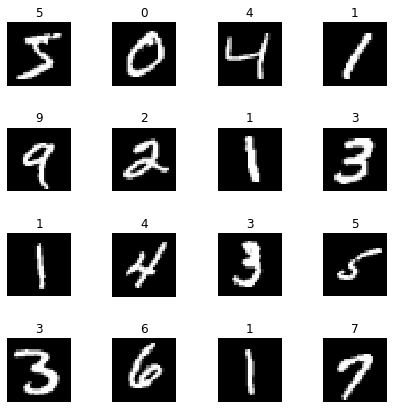

In [36]:
# Creates subplots within a single call
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

# Automatically adjust subplot parameters to give specified padding.
fig.tight_layout()

# Randomly pick 16 indices from the training data
random_idx = np.random.choice(train_data.shape[0], size=16, replace=False)

for i in range(4):
    for j in range(4):
        idx = j + i * 4
        axes[i, j].set_title(train_labels[idx])
        axes[i, j].imshow(train_data[idx].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

plt.show()

In [30]:
# Split into training and validation set
import random
from random import randint

random.seed(65)
random_number = randint(0, 100)

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2)

print("Training size: ", X_train.shape)
print("Validation size: ", X_train.shape)

Training size:  (48000, 784)
Validation size:  (48000, 784)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=10000, solver = 'lbfgs')
logistic_model.fit(X_train, y_train)


In [16]:
mnist.train_labels

array([5, 0, 4, ..., 5, 6, 8])